# Example Usage

In [1]:
import requests as req
import pandas as pd
from datetime import datetime
from utils import plot_quotes, plot_price_impact

import sys

sys.path.insert(0, "../")
from src.configs import SYMBOL_TO_ADDRESS

In [2]:
url = "http://97.107.138.106/quotes"
params = {
    "start": str(int(datetime(2023, 12, 1).timestamp())),
    "end": str(int(datetime(2023, 12, 8).timestamp())),
    "tokens": ",".join(
        [
            SYMBOL_TO_ADDRESS["WETH"],
            SYMBOL_TO_ADDRESS["USDC"],
            SYMBOL_TO_ADDRESS["USDT"],
        ]
    ),
}

res = req.get(url, params=params)
if res.status_code == 200:
    quotes = pd.DataFrame(res.json()).set_index(["src", "dst"])
    print(
        f"Fetched {len(quotes)} quotes with {len(quotes.index.unique())} unique pairs"
    )
else:
    print("Error:", res.status_code)

quotes.head()

Fetched 15480 quotes with 6 unique pairs


in_amount  \
src                                        dst                                                        
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48 0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  1.468771e+09   
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  1.964201e+09   
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  1.739787e+09   
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  5.808335e+09   
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  1.501095e+10   

                                                                                         out_amount  \
src                                        dst                                                        
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48 0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  7.152048e+17   
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  9.564498e+17   
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  8.472958e+17   
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  2.828304e+18   
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  7.315724e+18   

                                                                                          price  \
src                                        dst                                                    
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48 0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  0.000487   
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  0.000487   
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  0.000487   
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  0.000487   
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  0.000487   

                                                                                       price_impact  \
src                                        dst                                                        
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48 0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  8.587599e-04   
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  8.593805e-04   
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  7.149960e-04   
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  8.632218e-04   
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  8.191647e-07   

                                                                                        timestamp  
src                                        dst                                                     
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48 0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  1701388886  
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  1701388888  
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  1701388889  
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  1701388891  
                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  1701388892

In [3]:
in_token_sym = "WETH"
in_decimals = 18
out_token_sym = "USDC"

in_token = SYMBOL_TO_ADDRESS[in_token_sym]
out_token = SYMBOL_TO_ADDRESS[out_token_sym]

quotes_ = quotes.loc[(in_token, out_token)]

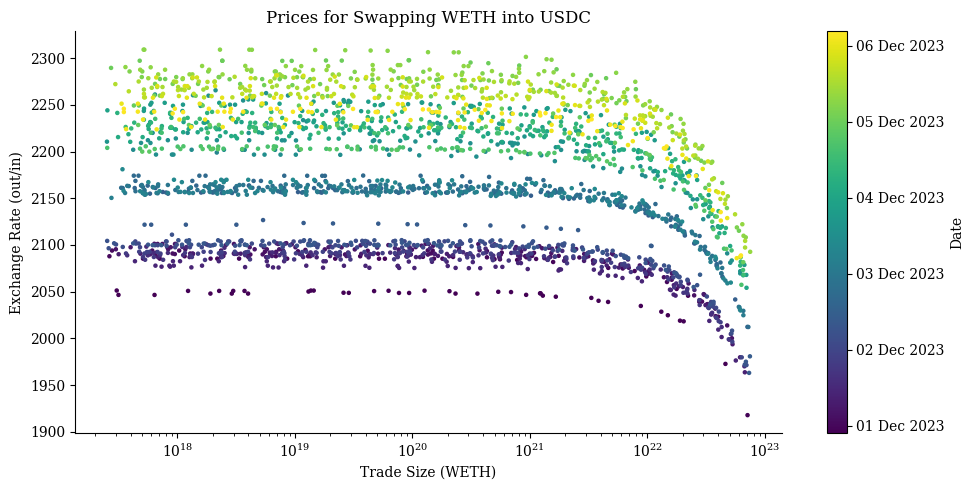

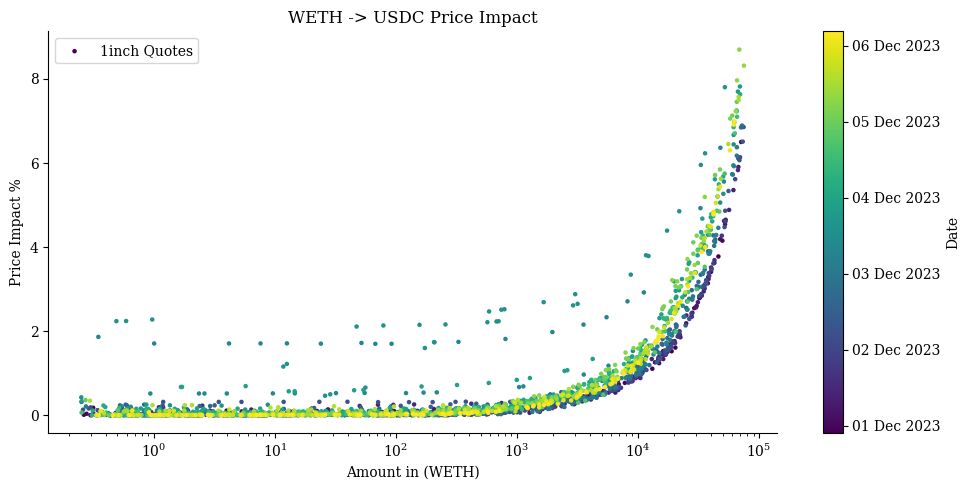

In [4]:
_ = plot_quotes(quotes_, in_token_sym, out_token_sym, fn="../figs/sample_quotes.png")
_ = plot_price_impact(
    quotes_,
    in_token_sym,
    out_token_sym,
    in_decimals,
    fn="../figs/sample_price_impact.png",
)